Code that produced figures for "Frustration propagation in tubular folable mechanisms" by Reddy, Karami and Nassar
https://arxiv.org/abs/2310.08498

In [3]:
'''Imports'''
%matplotlib widget

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

import zigzagsum as zs
import pyramids as pd
import pyvista as pv
pv.set_jupyter_backend('trame')

/Users/nassarh/miniforge3/envs/spring/lib/python3.12/site-packages/wslink/backends/aiohttp/__init__.py:76: UserWarning: It is recommended to use web.AppKey instances for keys.
https://docs.aiohttp.org/en/stable/web_advanced.html#application-s-config
  self.app["state"] = {}


In [4]:
'''Figure 1a'''

# plotter
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background("white")

pl.camera_position = [(0.5870471979212183, 2.1591482816814933, 1.377167665336478),
 (-0.7916247640895984, 0.7804763196706785, -0.0015042966743382957),
 (0.0, 0.0, 1.0)]

pl.camera_set = True

pl.enable_parallel_projection()

# Define reference unit cell
# of "equilateral" Miura ori
gamma = np.pi / 3
c = np.cos(gamma)
s = np.sin(gamma)
u0 = np.array([s, c, 0])
v0 = np.array([-s, c, 0])
w0 = np.array([[0, 1, 0], [0, 1, 0]])
sgnop = 1

# opening angle at initial zigzag
theta = np.pi / 5

# inclination angle at initial zigzag
beta = 0

for i in range(4):

    # number of cells per parallel
    N = 10*(i+2)

    # number of cells per meridian
    cells = 10*(i+1)

    # Define initial zigzag
    # opening theta, inclination beta, rotational symmetry of step  2 pi / N
    u, v, rot, _ = zs.zigcircle(theta, beta, N=N, u0=u0, v0=v0, w0=w0, sgnop=sgnop)

    # Build pattern: crease vectors and vertices
    U, V, W, _ = zs.manysteps(u, v, u0, v0, w0, cells, sgnop=sgnop, rot=rot)
    X, Y, Z = zs.integrate(U, V, W, N, per=True, rot=rot)

    X = (X-np.mean(X))/N
    Y = (Y-np.mean(Y))/N
    Z = (Z-np.mean(Z))/N

    # plot surface
    grid = pv.StructuredGrid(X-i/2, Y+i/2, Z)

    pl.add_mesh(grid, show_edges=True, line_width=3, color=[200, 60, 185], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0,backface_params=dict(color='gray'))

pl.show()

no solution - angle too large (well, it could be too small too)
after 14 iterations
no solution - angle too large (well, it could be too small too)
after 22 iterations
no solution - angle too large (well, it could be too small too)
after 31 iterations
no solution - angle too large (well, it could be too small too)
after 40 iterations


Widget(value="<iframe src='http://localhost:59253/index.html?ui=P_0x18c0d5df0_0&reconnect=auto' style='width: …

In [30]:
pl.camera_position

[(0.5870471979212183, 2.1591482816814933, 1.377167665336478),
 (-0.7916247640895984, 0.7804763196706785, -0.0015042966743382957),
 (0.0, 0.0, 1.0)]

In [59]:
_ = pl.screenshot("fig1a.png", scale=3)

In [3]:
'''Figure 1b'''

# plotter
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background("white")

pl.camera_position = [(0.5870471979212183, 2.1591482816814933, 1.377167665336478),
 (-0.7916247640895984, 0.7804763196706785, -0.0015042966743382957),
 (0.0, 0.0, 1.0)]

pl.camera_set = True

pl.enable_parallel_projection()

# Define reference pyramid
# square basis, equilateral
u0 = np.array([1.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 0.0])
wb0 = np.array([0.5, 0.5, -1 / np.sqrt(2)])
w0 = np.array([0.5, 0.5, 1 / np.sqrt(2)])

# opening angle
theta = 70 * np.pi / 180

# initial angle of incidence relative to axis of symmetry
beta = 0 * np.pi / 180

for i in range(4):

    # number of cells per parallel
    N = 10*(i+2)

    # number of cells per meridian
    cells = 10*(i+1)
    
    # Define zigzag: two vectors + invariance by rotation
    u, v, rot, _ = pd.zigcircle(theta, beta, N, u0=u0, v0=v0, w0=w0, wb0=wb0)

    # Build pattern: crease vectors and vertices
    U, V, W, _ = pd.manysteps(u, v, u0, v0, w0, wb0, cells, rot=rot)
    X, Y, Z, Xt, Yt, Zt = pd.integrate(U, V, W, N, per=False, rot=rot)

    X = np.hstack([X.ravel(), Xt.ravel()])
    Y = np.hstack([Y.ravel(), Yt.ravel()])
    Z = np.hstack([Z.ravel(), Zt.ravel()])

    X = (X-np.mean(X))/N - i/2
    Y = (Y-np.mean(Y))/N + i/2
    Z = (Z-np.mean(Z))/N

    nodes = np.hstack([X[:, None], Y[:, None], Z[:, None]])    

    # plot
    grid = pv.make_tri_mesh(nodes, np.array(pd.triangles(N, cells)))
    pl.add_mesh(grid, show_edges=True, line_width=3, color=[200, 60, 185], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0,backface_params=dict(color='gray'))

pl.show()

Widget(value="<iframe src='http://localhost:51242/index.html?ui=P_0x14ed5c550_1&reconnect=auto' style='width: …

In [57]:
_ = pl.screenshot("fig1b.png", scale=3)

In [4]:
'''Figure 1c'''

# plotter
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background("white")

# Define reference pyramid
# square basis, equilateral
u0 = np.array([1.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 0.0])
wb0 = np.array([0.5, 0.5, -1 / np.sqrt(2)])
w0 = np.array([0.5, 0.5, 1 / np.sqrt(2)])

# number of cells per parallel
N = 40

# number of cells per meridian
cells = 10

for i in range(4):
    # opening angle
    theta = (90-5*i) * np.pi / 180
    
    # initial angle of incidence relative to axis of symmetry
    beta = -30*i * np.pi / 180
    
    # Define zigzag: two vectors + invariance by rotation
    u, v, rot, _ = pd.zigcircle(theta, beta, N, u0=u0, v0=v0, w0=w0, wb0=wb0)

    # Build pattern: crease vectors and vertices
    U, V, W, _ = pd.manysteps(u, v, u0, v0, w0, wb0, cells)
    X, Y, Z, Xt, Yt, Zt = pd.integrate(U, V, W, N, per=False)

    X = np.hstack([X.ravel(), Xt.ravel()])
    Y = np.hstack([Y.ravel(), Yt.ravel()])
    Z = np.hstack([Z.ravel(), Zt.ravel()])

    X = (X-np.mean(X))/N - i/5
    Y = (Y-np.mean(Y))/N + i/5
    Z = (Z-np.mean(Z))/N

    nodes = np.hstack([X[:, None], Y[:, None], Z[:, None]])    

    # plot
    grid = pv.make_tri_mesh(nodes, np.array(pd.triangles(N, cells)))
    grid = grid.clip('x',origin=(X[0],0,0))
    grid = grid.clip('-x',origin=(X[100],0,0))
    pl.add_mesh(grid, show_edges=True, line_width=3, color=[200, 60, 185], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0,backface_params=dict(color='gray'))

pl.camera_position = [(1.4528483936151357, 1.5501074877276557, 1.285592406621384),
 (0.176153951295401, 0.27341304540792083, 0.008897964301649117),
 (-0.408248290463863, -0.4082482904638631, 0.816496580927726)]

pl.camera_set = True

pl.enable_parallel_projection()

pl.show()

Widget(value="<iframe src='http://localhost:51242/index.html?ui=P_0x14ed46ad0_2&reconnect=auto' style='width: …

In [19]:
pl.camera_position

[(1.4528483936151357, 1.5501074877276557, 1.285592406621384),
 (0.176153951295401, 0.27341304540792083, 0.008897964301649117),
 (-0.408248290463863, -0.4082482904638631, 0.816496580927726)]

In [5]:
_ = pl.screenshot("fig1c.png", scale=3)

In [5]:
'''Figure 1d'''

# plotter
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background("white")


# Define reference unit cell
# of "equilateral" Miura ori
gamma = np.pi / 3
c = np.cos(gamma)
s = np.sin(gamma)
u0 = np.array([s, c, 0])
v0 = np.array([-s, c, 0])
w0 = np.array([[0, 1, 0], [0, 1, 0]])
sgnop = 1

# number of cells per parallel
N = 4

# number of cells per meridian
cells = 4

for i in range(4):
    # opening angle
    theta = (100-30*i) * np.pi / 180
    
    # initial angle of incidence relative to axis of symmetry
    beta = 0

    # Define zigzag: two vectors + invariance by translation (the default)
    u, v, _ = zs.zigzag(theta, u0=u0, v0=v0, w0=w0, sgnop=sgnop)

    # Build pattern: crease vectors and vertices
    U, V, W, _ = zs.manysteps(u, v, u0, v0, w0, cells, sgnop=sgnop)
    X, Y, Z = zs.integrate(U, V, W, N, per=False)

    X = (X-np.mean(X))/N - i*1.5
    Y = (Y-np.mean(Y))/N + i*1.5
    Z = (Z-np.mean(Z))/N 

    # plot
    grid = pv.StructuredGrid(X, Y, Z)
    pl.add_mesh(grid, show_edges=True, line_width=3, color=[200, 60, 185], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0,backface_params=dict(color='gray'))

pl.camera_position = [(1.4476836269899407, 5.503733044082134, 3.3702520531933566),
 (-1.9105556498143401, 2.1454937672778542, 0.012012776389070251),
 (-0.4082482904638631, -0.4082482904638631, 0.816496580927726)]

pl.enable_parallel_projection()

pl.show()


Widget(value="<iframe src='http://localhost:51242/index.html?ui=P_0x1631b3090_3&reconnect=auto' style='width: …

In [15]:
pl.camera_position

[(1.4476836269899407, 5.503733044082134, 3.3702520531933566),
 (-1.9105556498143401, 2.1454937672778542, 0.012012776389070251),
 (-0.4082482904638631, -0.4082482904638631, 0.816496580927726)]

In [7]:
_ = pl.screenshot("fig1d.png", scale=3)

In [6]:
'''Figure 2'''

# plotter
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background("white")


# Define reference unit cell
# of "equilateral" Miura ori
theta = np.pi / 3
c = np.cos(theta/2)
s = np.sin(theta/2)
cs = 1/2/c
ss = np.sqrt(1-cs**2)

nodes = np.array([[0,0,0],[0,-ss,-cs],[s,0,-c],[0,ss,-cs],[-s,0,-c]])
tri = np.array([[0,1,2],[0,2,3],[0,3,4],[0,4,1]])

# plot
grid = pv.make_tri_mesh(nodes, tri)
pl.add_mesh(grid, show_edges=True, line_width=3, color=[200, 60, 185], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0,backface_params=dict(color='gray'))

pl.show()


Widget(value="<iframe src='http://localhost:51242/index.html?ui=P_0x14ede7d50_4&reconnect=auto' style='width: …

In [8]:
_ = pl.screenshot("pyr4.png")

In [7]:
'''Figure 3a'''

# plotter
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background("white")

# Define reference pyramid
# square basis, equilateral
u0 = np.array([1.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 0.0])
wb0 = np.array([0.5, 0.5, -1 / np.sqrt(2)])
w0 = np.array([0.5, 0.5, 1 / np.sqrt(2)])

# opening angle
theta = 100 * np.pi / 180

# initial angle of incidence relative to axis of symmetry
beta = 0 * np.pi / 180

# number of cells per parallel
N = 20

# number of cells per meridian
cells = 7

for i in range(1):
    # cylidner axis
    phi = 30 * np.pi / 180

    # define rotational symmetry
    # axis
    p = np.array([np.cos(phi), np.sin(phi), 0])
    P = np.array([[0, -p[2], p[1]], [p[2], 0, -p[0]], [-p[1], p[0], 0]])

    # angle
    gamma = np.pi/2-theta
    alpha = 2 * gamma / (np.cos(phi)-np.sin(phi))
    beta = 2 * gamma / (np.cos(phi)+np.sin(phi))
    dphi = (beta - alpha)*1.2

    # rotation
    rot = np.eye(3) + np.sin(dphi) * P + (1 - np.cos(dphi)) * np.dot(P, P)

    # Define zigzag: two vectors + invariance by rotation
    u, v, _, _ = pd.zigcircle(theta, beta, N, u0=u0, v0=v0, w0=w0, wb0=wb0)

    # Build pattern: crease vectors and vertices
    U, V, W, _ = pd.manysteps(u, v, u0, v0, w0, wb0, cells, rot=rot)
    X, Y, Z, Xt, Yt, Zt = pd.integrate(U, V, W, N, per=False, rot=rot)

    X = np.hstack([X.ravel(), Xt.ravel()])
    Y = np.hstack([Y.ravel(), Yt.ravel()])
    Z = np.hstack([Z.ravel(), Zt.ravel()])

    X = (X-np.mean(X))/N - i
    Y = (Y-np.mean(Y))/N + i
    Z = (Z-np.mean(Z))/N

    nodes = np.hstack([X[:, None], Y[:, None], Z[:, None]])    

    # plot
    grid = pv.make_tri_mesh(nodes, np.array(pd.triangles(N, cells)))
    pl.add_mesh(grid, show_edges=True, line_width=3, color=[200, 60, 185], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0,backface_params=dict(color='gray'))

pl.enable_parallel_projection()

pl.show()

Widget(value="<iframe src='http://localhost:51242/index.html?ui=P_0x163198190_5&reconnect=auto' style='width: …

In [18]:
_ = pl.screenshot("cyl.png", scale = 3)

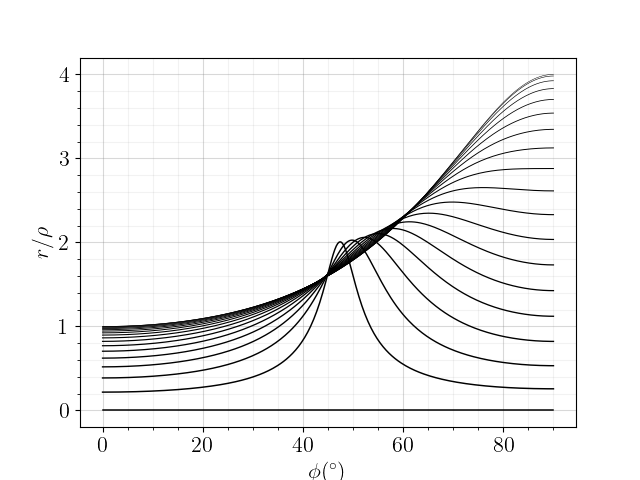

In [8]:
'''Figure 3b'''

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots()

ax.set_xlabel(r'$\phi(^\circ)$')
ax.set_ylabel(r'$r/\rho$')

ax.grid(which = 'major', alpha=0.3, color="gray")

ax.minorticks_on()
ax.grid(which = 'minor', alpha=0.1, color="gray")

phi = np.linspace(0,np.pi/2,300)
for theta in range(0,91,5):
    theta = theta * np.pi/180
    c = np.cos(theta/2)
    s = np.sin(theta/2)
    cs = 1/2/c
    ss = np.sqrt(1-cs**2)

    rho = 1/2*np.sqrt(1-(ss*np.sin(phi)+s*np.cos(phi))**2)*np.sqrt(1-(ss*np.sin(phi)-s*np.cos(phi))**2)/np.abs(c-cs)

    # ax.contourf(theta,phi,rho =)
    ax.plot(phi*180/np.pi,1/rho,'k',linewidth= np.log(theta+1.4))

# ax.legend([r'$0^\circ$',r'$45^\circ$',r'$60^\circ$',r'$75^\circ$',r'$90^\circ$'])
fig.savefig('curvature.svg')

In [9]:
'''Figure 4a'''

# plotter
pl = pv.Plotter()
pl.enable_anti_aliasing('ssaa')
pl.set_background("white")

pl.enable_parallel_projection()

# Define reference pyramid
# square basis, equilateral
u0 = np.array([1.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 0.0])
wb0 = np.array([0.5, 0.5, -1 / np.sqrt(2)])
w0 = np.array([0.5, 0.5, 1 / np.sqrt(2)])

# surface 1: cylinder pyramids out
# i, space, N, cells, theta, beta
for (space,N,cells,theta,beta) in [
    [0,100,30,np.pi/2-np.pi/100/2,0],
                                   [0.3,100,45,np.pi/2,np.pi/6],
                                   [0.6,100,45,np.pi/2,np.pi/2],
                                   [0.9,100,45,np.pi/2*1.1124,2*np.pi/3*1.0],
                                   [1.2,100,45,np.pi/2+np.pi/100/2,np.pi],
                                   [1.5,100,45,np.pi/2*1.112415,2*np.pi/3*1.0]
                                   ]:
    u, v, rot, _ = pd.zigcircle(theta, beta, N, u0=u0, v0=v0, w0=w0, wb0=wb0)
    U, V, W, _ = pd.manysteps(u, v, u0, v0, w0, wb0, cells, rot=rot)
    x, y, z, Xt, Yt, Zt = pd.integrate(U, V, W, N, per=False, rot=rot)
    X = np.hstack([x.ravel(), Xt.ravel()])
    Y = np.hstack([y.ravel(), Yt.ravel()])
    Z = np.hstack([z.ravel(), Zt.ravel()])
    X = (X-np.mean(X))/N - space*0
    Y = (Y-np.mean(Y))/N + space*0
    Z = (Z-np.mean(Z))/N - space*2
    nodes = np.hstack([X[:, None], Y[:, None], Z[:, None]])    
    grid = pv.make_tri_mesh(nodes, np.array(pd.triangles(N, cells)))
    # grid = grid.clip('-z',origin=(-space,space,0))
    grid = grid.clip('x',origin=(-space*0,space*0,-space*2))
    pl.add_mesh(grid, show_edges=True, line_width=3, color=[200, 60, 185], lighting=True, ambient=0.3, specular=0.2, metallic=1, roughness=0,backface_params=dict(color='gray'))    
    # pl.set_focus(grid.center)
pl.show()

Widget(value="<iframe src='http://localhost:51242/index.html?ui=P_0x14ed45410_6&reconnect=auto' style='width: …

In [73]:
_ = pl.screenshot("elasticae.png", scale = 10)

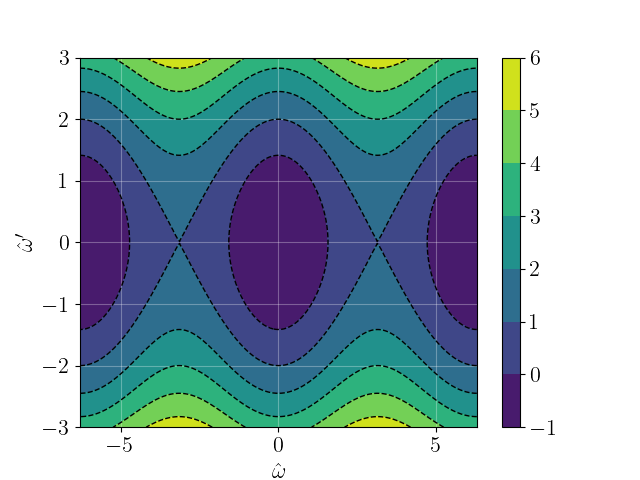

In [10]:
'''Figure 4b'''
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots()

[omega, domega] = np.meshgrid(np.linspace(-2*np.pi,2*np.pi, 200),
                               np.linspace(-3, 3, 200))

mechE = 1/2*domega**2 - np.cos(omega)

cs = ax.contourf(omega, domega, mechE)
plt.colorbar(cs)
ax.contour(omega,
            domega,
            mechE,
            colors='k',
            linestyles='dashed',
            linewidths=1)

ax.set_xlabel(r'$\hat\omega$')
ax.set_ylabel(r'$\hat\omega^\prime$')
ax.grid(which='major', alpha=0.3, color='w')


In [101]:
fig.savefig('phase.svg')

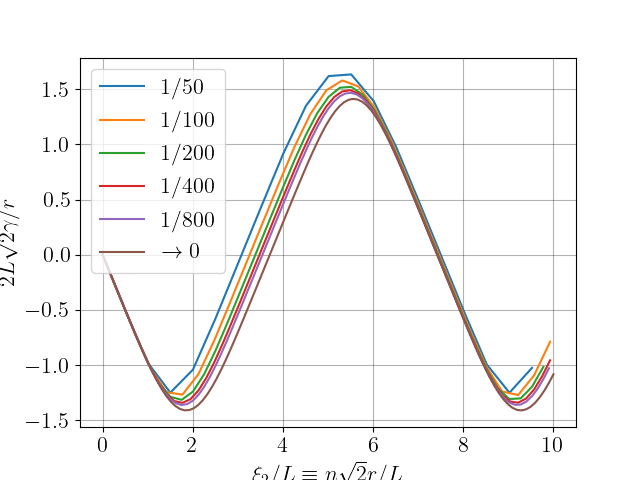

In [29]:
'''Figure 5a'''
# Define reference pyramid
# square basis, equilateral
u0 = np.array([1.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 0.0])
wb0 = np.array([0.5, 0.5, -1 / np.sqrt(2)])
w0 = np.array([0.5, 0.5, 1 / np.sqrt(2)])

# comparison range
xi2hatMax = 10

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots()

# number of cells per parallel
for N in [50,100,200,400,800]:

    # number of cells per meridian
    cells = N

    # opening angle
    theta = np.pi/2

    # initial angle of incidence relative to axis of symmetry
    beta = np.pi/2

    # Define zigzag: two vectors + invariance by rotation
    u, v, rot, _ = pd.zigcircle(theta, beta, N, u0=u0, v0=v0, w0=w0, wb0=wb0)

    # Build pattern: crease vectors and vertices
    U, V, W, _ = pd.manysteps(u, v, u0, v0, w0, wb0, cells, rot=rot)
    
    r = 1/N
    W = N*r*np.sqrt(2)
    q = 2*np.pi/W

    L = np.sqrt(r/4/np.sqrt(2)/q)
    gamma = np.pi/2-np.arccos(np.sum(U*V,axis=1))
    omegahatprime = gamma*2*np.sqrt(2)*L/r

    xi2hat = np.arange(0,cells+1)*np.sqrt(2)*r/L/2

    ax.plot(xi2hat[xi2hat<xi2hatMax],omegahatprime[xi2hat<xi2hatMax])

# ax.plot(t,omegaprime)

ax.set_xlabel(r'$\xi_2/L\equiv n\sqrt{2}r/L$')
ax.set_ylabel(r'$2L\sqrt{2}\gamma/r$')
ax.grid(which='major', alpha=0.3, color='k')

ax.legend([r'$1/50$',r'$1/100$',r'$1/200$',r'$1/400$', r'$1/800$', r'$\to 0$'])



In [180]:
fig.savefig('convergence1.svg')

20
29
40
57
80
113
160
226
320


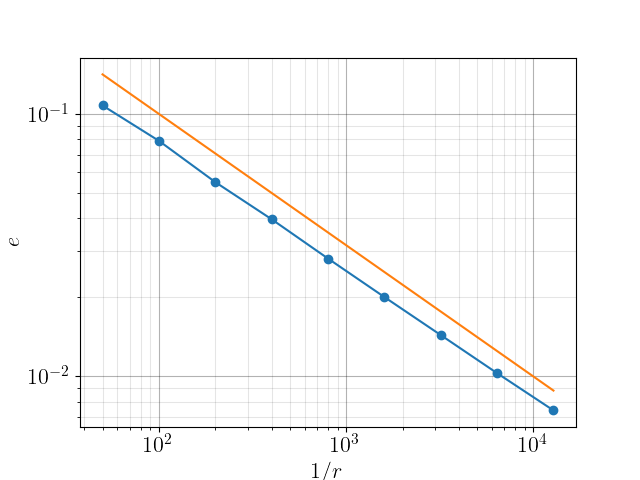

In [30]:
'''Figure 5b'''
# initial angle of incidence relative to axis of symmetry
beta = np.pi/2

# opening angle
theta = np.pi/2
gamma0 = np.pi/2-theta

# theoretical prediction
npts = 100
tmax = 10
t = np.linspace(0,tmax,npts)
dt = tmax/(npts-1)
omega = np.zeros(npts)
omegaprime = np.zeros(npts)

for i in range(40):
    omega = beta + sp.integrate.cumulative_trapezoid(omegaprime,t,initial=0)
    omegaprime = gamma0 - sp.integrate.cumulative_trapezoid(np.sin(omega),t,initial=0)

# Define reference pyramid
# square basis, equilateral
u0 = np.array([1.0, 0.0, 0.0])
v0 = np.array([0.0, 1.0, 0.0])
wb0 = np.array([0.5, 0.5, -1 / np.sqrt(2)])
w0 = np.array([0.5, 0.5, 1 / np.sqrt(2)])

error = []

# number of cells per parallel
sample = np.array([50,100,200,400,800,1600,3200,6400,12800])
for N in sample:

    # number of cells per meridian
    cells = N

    # Define zigzag: two vectors + invariance by rotation
    u, v, rot, _ = pd.zigcircle(theta, beta, N, u0=u0, v0=v0, w0=w0, wb0=wb0)

    # Build pattern: crease vectors and vertices
    U, V, W, _ = pd.manysteps(u, v, u0, v0, w0, wb0, cells, rot=rot)
    
    r = 1/N
    W = N*r*np.sqrt(2)
    q = 2*np.pi/W

    L = np.sqrt(r/4/np.sqrt(2)/q)
    gamma = np.pi/2-np.arccos(np.sum(U*V,axis=1))
    omegahatprime = gamma*2*np.sqrt(2)*L/r

    xi2hat = np.arange(0,cells+1)*np.sqrt(2)*r/L/2
    xi2hat, omegahatprime = xi2hat[xi2hat<tmax], omegahatprime[xi2hat<tmax]

    # error computation
    error = error + [np.linalg.norm(np.interp(xi2hat,t,omegaprime)-omegahatprime)*np.sqrt(np.sqrt(2)*r/L/2)/tmax]
    print(np.size(xi2hat))


plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots()

ax.plot(sample,error,'-o')
ax.plot(sample,1/np.sqrt(sample),'-')

ax.set_xlabel(r'$1/r$')
ax.set_ylabel(r'$e$')
ax.set_xscale('log')
ax.set_yscale('log')

# ax.grid('both')
ax.grid(which='major', alpha=0.3, color='k')
ax.grid(which='minor', alpha=0.1, color='k')
# ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())

# ax.axis('equal')

In [31]:
fig.savefig('convergence2.svg')

: 

In [26]:
plt.close('all')